| column name         | description                                                                               |
|------------|--------------------------------------------------------------------------------------------------------------------------|
| pt         | transverse momentum relative to beam axis                                                                                |
| eta        | pseudorapidity given by $\eta = -ln(tan\theta/2))$ where $\theta$ is the polar angle measured with respect to the z-axis [ATLAS Collaboration (2013)](https://arxiv.org/abs/1206.5369)|
| phi        | azimuthal angle measured around the beam axis                                                                            |
| mass       | jet mass                                                                                                                 |
| ee2, ee3   |  energy correlation function 2 and 3, used in identifying the hadronic decays of boosted Z bosons  [Larkowski, A. J. 2014](https://doi.org/10.1007/JHEP12(2014)009)                        |
| d2         | discriminating variable to identify boosted two prong jets given by $D^{(\beta)}_2 =\frac{e^{(\beta)}_3}{(e^{(\beta)}_2)^3}$ [Larkowski, A. J. (2014)](https://doi.org/10.1007/JHEP12(2014)009)                                                              |
| angularity | has characteristic distribution for two-body decays                                                                       |
| t1         | $\tau_1$; 1-subjettiness                                                                                                 |
| t2         | $\tau_2$; 2-subjettiness                                                                                                 |
| t3         | $\tau_3$; 3-subjettiness                                                                                                 |
| t21        |  $\tau_2/\tau_1$                                                                                                                        |
| t32        | $\tau_3/\tau_2$                                                                                                          |
| KtDeltaR   | $\Delta R$ of two subjets within the large-R jet [Eur. Phys. J. C 79 (2019) 836](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/PERF-2017-04/)                                                                        |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
higgs = pd.read_pickle('higgs_100000_pt_1000_1200.pkl')
qcd = pd.read_pickle('qcd_100000_pt_1000_1200.pkl')

In [3]:
qcd.head(5)
qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

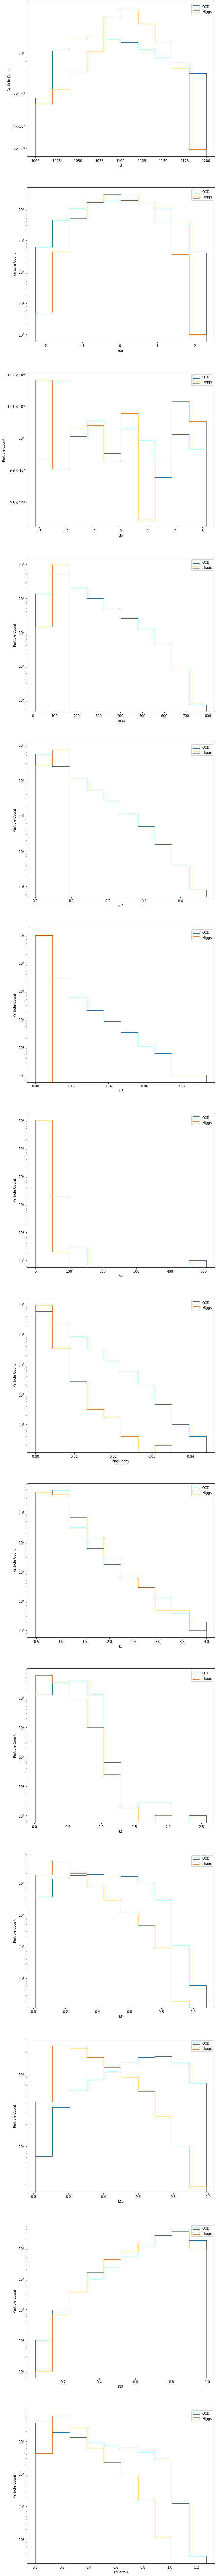

In [4]:
keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

fig, ax = plt.subplots(14, 1, figsize = (10,10*14))

for i in range(len(keys)):
    hist1 = ax[i].hist(qcd[keys[i]], label = 'QCD', histtype = 'step')
    hist2 = ax[i].hist(higgs[keys[i]], bins = hist1[1],label = 'Higgs', histtype = 'step')
    ax[i].semilogy()
    ax[i].legend()
    ax[i].set_xlabel(keys[i])
    ax[i].set_ylabel('Particle Count')

Not all features provide discrimination power between signal and background. The distribution of pt, d2, t2, t3, t21, and KtdeltaR for QCD and Higgs are different so it is possible to discriminate between signal and noise.

There are some correlations among the features. For example, d2 is calculated from ee2 and ee3. t21 and t32 are calculated from t1, t2, and t3. 

Next I normalize the data with expected yields and plot it in a stacked bar plot. 

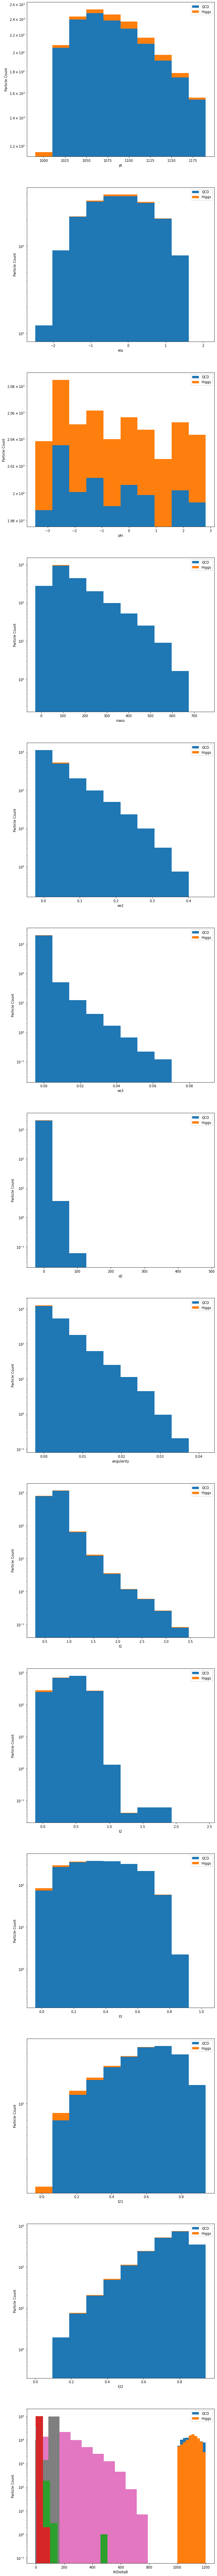

In [13]:
# Expected Yields:
# N_higgs = 50
# N_qcd = 2000

normalization_higgs = 50/100000
normalization_qcd = 2000/100000
#print(normalization_higgs, normalization_qcd)

keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

fig, ax = plt.subplots(14, 1, figsize = (10,10*14))
for i in range(len(keys)):
    hist_qcd = plt.hist(qcd[keys[i]])
    normalized_hist_qcd = hist_qcd[0]*normalization_qcd
    
    hist_higgs = plt.hist(higgs[keys[i]], bins = hist_qcd[1])
    normalized_hist_higgs = hist_higgs[0]*normalization_higgs
    
    width = hist_qcd[1][1]-hist_qcd[1][0]

    ax[i].bar(hist_qcd[1][:10], normalized_hist_qcd, width = width, label = 'QCD')
    ax[i].bar(hist_higgs[1][:10], normalized_hist_higgs, width = width, bottom = normalized_hist_qcd, label = 'Higgs')
    
    ax[i].semilogy()
    ax[i].legend()
    ax[i].set_xlabel(keys[i])
    ax[i].set_ylabel('Particle Count')
plt.show()

I have no idea why the KtDeltaR plot is doing that. 

It gets really hard to differentiate background from signal. I think if the background is well known, we can use pt and phi. To model the background, we can use a Poisson distribution with mean to be the number of expected QCD. Then the signal would be N_qcd + N_higgs. The signal strength would have to be 2228 or above.

In [4]:
n_qcd = 2000
prob5sigma = 1/3.5e6
signal = stats.poisson.isf(prob5sigma, n_qcd)
print(signal)

2228.0
